In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

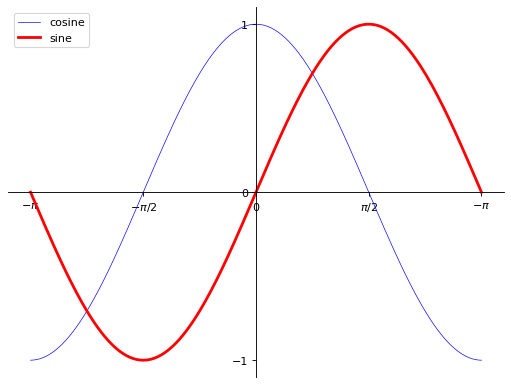

In [11]:
# Matplotlib example
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot settings

# Create a figure 8x6 inches with a dpi of 80
plt.figure(figsize=(8,6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1,1,1)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=0.6, linestyle="-", label = "cosine")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label = "sine")

plt.xlim(X.min() * 1.1, X.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$-\pi$'])

plt.ylim(C.min() * 1.1, C.max() * 1.1)

plt.yticks([-1, 0, +1])

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

plt.legend(loc='upper left')

plt.show()

In [27]:
# Scipy example
x = np.arange(10, 30)
print(sp.special.gammaln(x))

# linalg
A = np.array([[1,2],
                [3,4]])
print(sp.linalg.det(A))
b = np.array([14,23])
x = sp.linalg.solve(A, b)
print(x)
print(np.allclose(A @ x, b))

# SVD
U, s, Vh = sp.linalg.svd(A)
print(s)

# Interpolation
measured_time = np.linspace(0, 1, 10)
rng = np.random.default_rng()
noise = (rng.random(10)*2 - 1) * 1e-1
measures = np.sin(2* np.pi * measured_time) + noise

spline = sp.interpolate.CubicSpline(measured_time, measures)
print(spline)

[12.80182748 15.10441257 17.50230785 19.9872145  22.55216385 25.19122118
 27.89927138 30.67186011 33.50507345 36.39544521 39.33988419 42.33561646
 45.3801389  48.47118135 51.60667557 54.7847294  58.00360522 61.26170176
 64.55753863 67.88974314]
-2.0
[-5.   9.5]
True
[5.4649857  0.36596619]


In [35]:
# Root finding
def f(x):
    return (x-1)*(x-2)
def df(x):
    return 2*x - 3
x0 = 0
res = sp.optimize.root_scalar(f, x0=x0, fprime=df)
print(res)
res = sp.optimize.root_scalar(f, bracket=(1.5, 10))
print(res)

def f(x):
    return [x[0] ** 2 + x[1]**2 - 1,
            x[1] - x[0]]
res = sp.optimize.root(f, x0=[0,0])
print(np.allclose(f(res.x), 0, atol=1e-10))
print(np.allclose(res.x, np.sqrt(2)/2))
print(res)

# If the problem is overconstrained, we can find the least square error solution using method='lm' (Levenberg marquandt)
def f(x):
    return [x[0]**2 + x[1] **2 - 1,
            x[1] - x[0],
            x[1] - x[0]**2]

res = sp.optimize.root(f, x0=[1,1], method='lm')
print(res)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 1.0
         method: newton
      converged: True
           flag: converged
 function_calls: 15
     iterations: 14
           root: 2.0
         method: brentq
True
True
 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.220e-16  0.000e+00]
       x: [ 7.071e-01  7.071e-01]
  method: hybr
    nfev: 21
    fjac: [[-8.165e-01  5.774e-01]
           [-5.774e-01 -8.165e-01]]
       r: [-1.732e+00 -5.773e-01 -1.633e+00]
     qtf: [ 3.273e-11  2.315e-11]
 message: Both actual and predicted relative reductions in the sum of squares
            are at most 0.000000
 success: True
  status: 1
     fun: [ 1.490e-02 -1.008e-01  8.112e-02]
       x: [ 7.610e-01  6.602e-01]
   cov_x: [[ 1.798e-01  2.461e-02]
           [ 2.461e-02  2.705e-01]]
  method: lm
    nfev: 16
    fjac: [[-2.373e+00 -4.214e-01 -6.413e-01]
           [ 2.159e-01 -1.923e+00  7.445e-01]]
    ipvt:

In [37]:
# curve fitting
x = np.linspace(-5, 5, num=50)
noise = 0.01 * np.cos(100 * x)
a, b = 2.9, 1.5
y = a * np.cos(b*x) + noise

# We can approx ampl, freq and phase of the data under the noise by least squares
# We need a function that takes x as the first input and the params as the rest
def f(x, a, b, c):
    return a * np.sin(b * x + c)

params, _ = sp.optimize.curve_fit(f, x, y, p0=[2,1,3])
ref = [a, b, np.pi/2] # expected results
print(np.allclose(params, ref, rtol=1e-3))

True


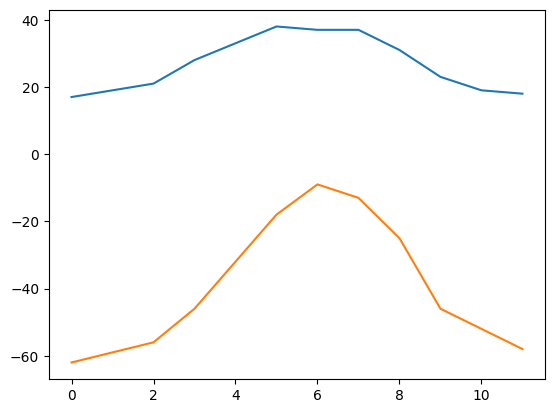

[26.75       10.93254952 -2.72348005]


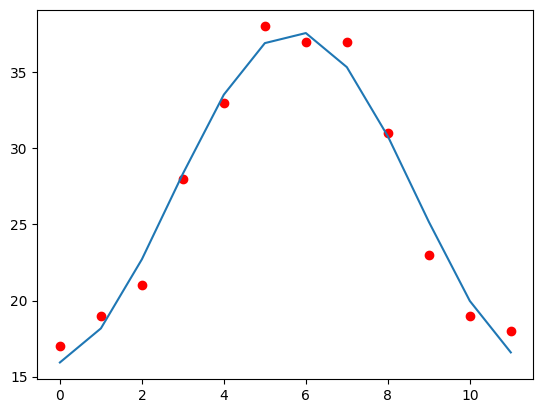

In [66]:
# Exercise: Testing (scientific) models for describing temperatures
maxT = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
minT = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


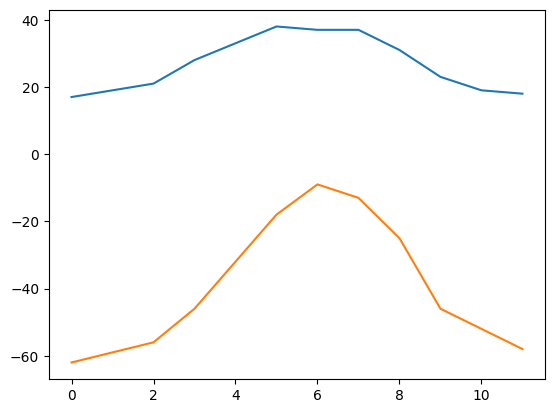

[26.75       10.93254952 -2.72348005]
[-39.66666667  25.58169524  -3.15603649]
max params:  [26.75       10.93254952 -2.72348005]
min params:  [-39.66666667  25.58169524  -3.15603649]
max cov:  [[ 1.58575615e-01 -1.15274778e-09  3.53045463e-11]
 [-1.15274778e-09  3.17151229e-01 -3.34871031e-10]
 [ 3.53045463e-11 -3.34871031e-10  9.67892826e-03]]
min cov:  [[ 1.63081378e+00 -7.29655397e-09  3.53116699e-10]
 [-7.29655397e-09  3.26162756e+00  3.81559177e-09]
 [ 3.53116699e-10  3.81559177e-09  1.81794151e-02]]


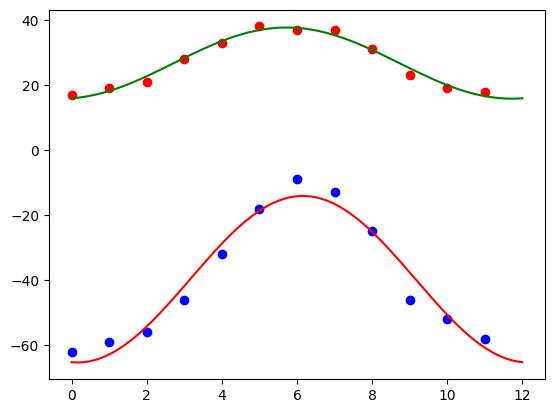

In [74]:
# Solution
np.array(list(zip(maxT, minT)))
months = np.arange(12)
days = np.linspace(0, 12, num=365)

plt.plot(ts, maxT)
plt.plot(ts, minT)
plt.show()

def temp(t, avg, ampl, t_o):
    return avg + ampl*np.sin((t + t_o) * np.pi/6)

res_max, cov_max = sp.optimize.curve_fit(temp, ts, maxT, [30, 10, 0])
print(res_max)
res = temp(days, *res_max)
plt.plot(months, maxT, "ro")
plt.plot(days, res, "green") 

res_min, cov_min = sp.optimize.curve_fit(temp, ts, minT, [-40, 20, 0])
print(res_min)
res = temp(days, *res_min)
plt.plot(months, minT, "bo")
plt.plot(days, res, "red")

print("max params: ", res_max)
print("min params: ", res_min)
print("max cov: ", cov_max)
print("min cov: ", cov_min)

plt.show()